## Statistical and Machine Learning, Fall 2024

### Week 5: Loss Function Optimization using Gradient Descent		

### Instructor: Farhad Pourkamali 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388Online/blob/main/Week5.ipynb)



### From the Previous Lecture: Gradient of Residual Sum of Squares (RSS)
<hr style="border:2px solid gray">


<img src="
https://github.com/farhad-pourkamali/MATH6388/blob/main/images/ml_general.png?raw=true" width=500>


* Let us revisit the loss function for linear regression

$$\begin{align}\text{RSS}(\mathbf{w})=& \frac{1}{2}\|\mathbf{X}\mathbf{w}-\mathbf{y}\|_2^2=\frac{1}{2}(\mathbf{X}\mathbf{w}-\mathbf{y})^T(\mathbf{X}\mathbf{w}-\mathbf{y})\\
=&\frac{1}{2}(\mathbf{w}^T\mathbf{X}^T-\mathbf{y}^T)(\mathbf{X}\mathbf{w}-\mathbf{y})\\=&\frac{1}{2}(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}-2\langle\mathbf{X}^T\mathbf{y},\mathbf{w}\rangle+\mathbf{y}^T\mathbf{y})\end{align}$$

* Hence 

$$\nabla \text{RSS}(\mathbf{w})=\frac{1}{2}(2\mathbf{X}^T\mathbf{X}\mathbf{w}-2\mathbf{X}^T\mathbf{y})=\mathbf{X}^T(\mathbf{X}\mathbf{w}-\mathbf{y})$$

* Setting the gradient to zero gives 

$$\begin{align}\mathbf{X}^T\mathbf{X}\mathbf{w}=\mathbf{X}^T\mathbf{y}\\
\hat{\mathbf{w}}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\end{align}$$



### Algorithmic issues 
<hr style="border:2px solid gray">

* We should not compute the inverse of $\mathbf{X}^T\mathbf{X}$ due to numerical reasons (it may be ill-conditioned or singular)

* Besides, the computational complexity of inverting such a matrix is about $O(D^3)$
    + Double the number of features, computational cost will be increased by a factor of 8

* For large-scale problems, it may be impossible to even store $\mathbf{X}$ in the main memory

* Alternative
    * Gradient descent is a *generic* optimization algorithm 
        + Compute the gradient, then tweak parameters iteratively to minimize a loss function
        + No matrix inversion needed
        
    * Given a scalar function $f(x)$, where $f$ represents a general function and $x$ is the input, the update rule for gradient descent is
    $$x_{k+1} = x_k - \eta \nabla f(x_k)$$
        + $x_k$ is the current value of the parameter at iteration 
        + $\eta>0$ is the learning rate, which controls the step size in each iteration
        + $\nabla f(x_k)$ is the gradient/derivative of the function $f(x)$ at point $x_k$, which points in the direction of the steepest increase

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):  
    return x ** 2

def f_grad(x):  
    return 2 * x

def gd(eta, f_grad):
    x = 10.0  # initial solution 
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    return results

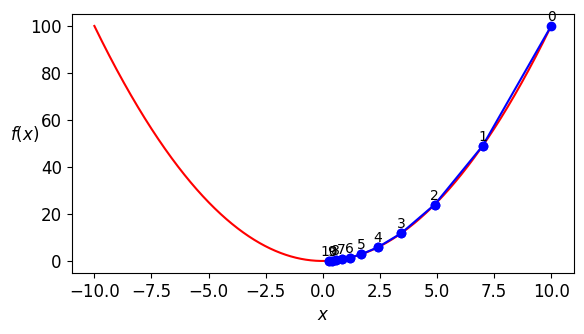

In [2]:
def show_trace(results):
    
    n = max(abs(min(results)), abs(max(results)))
    f_line = np.arange(-n, n, 0.01)
    plt.plot(f_line, [f(x) for x in f_line], 'r-') # Plot the function
    
    for i in range(0, len(results), 1):
        plt.plot(results[i:i+2], [f(x) for x in results[i:i+2]], 'bo-') # Plot "updates"
        
        plt.text(results[i], f(results[i])+1, str(i), fontsize=10, ha='center', va='bottom')
        
        
    plt.xlabel('$x$')
    
    plt.ylabel('$f(x)$', rotation=0)
    
    plt.tight_layout()
    
    plt.show()
    
plt.rcParams.update({'font.size': 12, "figure.figsize": (6,3.5)})

show_trace(gd(0.15, f_grad))


### Gradient descent (GD)
<hr style="border:2px solid gray">

* Consider the following optimization problem

$$\underset{\mathbf{w}}{\operatorname{argmin}} \mathcal{L}(\mathbf{w})$$

* At each iteration $k$, perform an update to decrease the loss function

$$\mathbf{w}_{k+1}=\mathbf{w}_k - \eta \nabla \mathcal{L}(\mathbf{w}_k)$$

where $\eta$ is known as the step size or learning rate


### Application to linear regression

<hr style="border:2px solid gray">

* Let us consider the mean squared error (MSE)
$$\text{MSE}(\mathbf{w})=\frac{1}{N}\|\mathbf{y}-\mathbf{X}\mathbf{w}\|_2^2=\frac{2}{N}\text{RSS}(\mathbf{w})$$

* Hence, the gradient of MSE can be computed as follows

$$\nabla \text{MSE}(\mathbf{w})=\frac{2}{N}\nabla \text{RSS}(\mathbf{w})=\frac{2}{N}\mathbf{X}^T(\mathbf{X}\boldsymbol{\mathbf{w}}-\mathbf{y})$$

* Update formula with constant step size 

$$\mathbf{w}_{k+1}=\mathbf{w}_k - \eta \underbrace{\nabla \text{MSE}(\mathbf{w}_k)}_{\frac{2}{N}\mathbf{X}^T(\mathbf{X}\boldsymbol{\mathbf{w}_k}-\mathbf{y})}$$

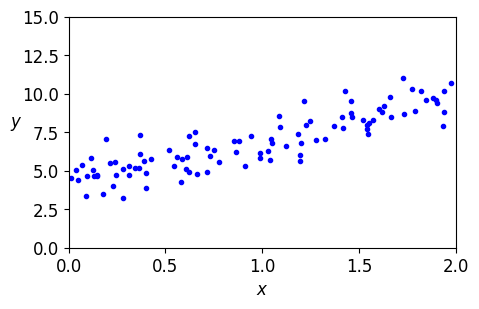

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12, "figure.figsize": (5,3)})

np.random.seed(42)
N = 100 # number of samples 
X = 2 * np.random.rand(N, 1) # x values 
y = 4 + 3 * X + np.random.randn(N, 1) # y values 

plt.plot(X, y, "b.")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
# add x0 = 1 to each instance or sample 
X_b = np.c_[np.ones((N, 1)), X]  

# use matrix inversion 
w_best = np.linalg.inv(X_b.T@X_b)@(X_b.T)@y

print(w_best)

[[4.21509616]
 [2.77011339]]


In [5]:
# Gradient descent implementation 

eta = 0.1  # learning rate
n_iterations = 100 # number of iterations or steps 

w = np.random.randn(2,1)  # random initialization

print("initial solution:" + '\n'+ str(w))

for iteration in range(n_iterations):
    gradients = (2/N) * (X_b.T)@(X_b@w - y)
    w = w - eta * gradients
    
print("final solution:" + '\n' + str(w))

initial solution:
[[0.01300189]
 [1.45353408]]
final solution:
[[4.16104533]
 [2.81783733]]


In [6]:
# Investigating the influence of learning rate (3 values)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

def plot_gradient_descent(w, eta):
    plt.plot(X, y, "b.")
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(w)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = (2/N) * X_b.T.dot(X_b.dot(w) - y)
        w = w - eta * gradients
    plt.xlabel("$x$", fontsize=14)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=18)

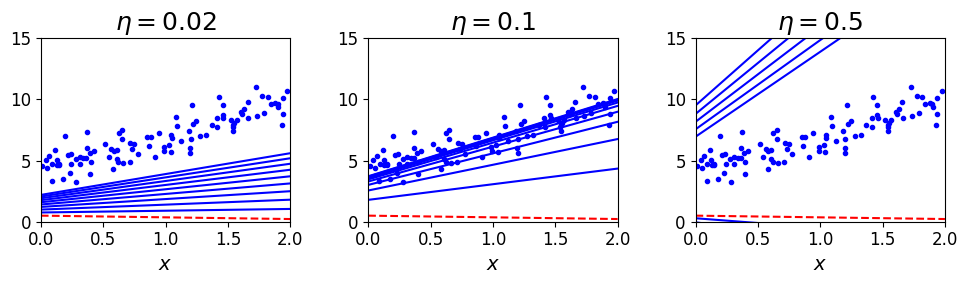

In [7]:
np.random.seed(42)
w = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,3))
plt.subplot(131); plot_gradient_descent(w, eta=0.02)
plt.subplot(132); plot_gradient_descent(w, eta=0.1)
plt.subplot(133); plot_gradient_descent(w, eta=.5)

plt.tight_layout()

### Stochastic gradient descent (SGD)

<hr style="border:2px solid gray">

* The main problem with gradient descent is that it uses the whole training data set 

$$\text{MSE}(\mathbf{w})=\frac{1}{N}\|\mathbf{Xw}-\mathbf{y}\|_2^2\Rightarrow\nabla \text{MSE}(\mathbf{w})=\frac{2}{N}\mathbf{X}^T(\mathbf{X}\boldsymbol{\mathbf{w}}-\mathbf{y})$$

* In general, empirical risk and its gradient can be viewed as a finite sum 

$$\mathcal{L}(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N l\big(y_n,f(\mathbf{x}_n;\boldsymbol{\theta})\big) \Rightarrow \nabla \mathcal{L}(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N \nabla l \big(y_n,f(\mathbf{x}_n;\boldsymbol{\theta})\big)$$

* Approximate the full gradient by randomly sampling a minibatch of $B\ll N$ samples 
$$\frac{1}{|\mathcal{B}_t|}\sum_{n\in\mathcal{B}_t}\nabla l(y_n,f(\mathbf{x}_n;\boldsymbol{\theta}))$$

* This is an unbiased estimator 
    * Sketch of proof: consider $B=1$ and let $U$ be a discrete random variable with the following probability mass function
 
    $$P(U=n)=\frac{1}{N}, \;n=1,\ldots,N$$
    
    * Thus, we have 
    $$\mathbb{E}\big[\nabla l(y_U,f(\mathbf{x}_U;\boldsymbol{\theta})) \big]=\sum_{n=1}^NP(U=n)\nabla l(y_n,f(\mathbf{x}_n;\boldsymbol{\theta}))=\nabla \mathcal{L}(\boldsymbol{\theta})$$


### SGD for fitting linear regression

<hr style="border:2px solid gray">

* Consider a minibatch of size $B=1$ and a selected sample $\mathbf{x}_n$ from $\mathbf{X}$ (row vector)

$$\nabla \text{MSE}(\mathbf{w})=\frac{2}{N}\mathbf{X}^T(\mathbf{X}\boldsymbol{\mathbf{w}}-\mathbf{y}) \Rightarrow \nabla \text{MSE}(\mathbf{w})=2\mathbf{x}_n^T(\mathbf{x}_n\boldsymbol{\mathbf{w}}-y_n)$$

$$\mathbf{w}_{k+1}=\mathbf{w}_k - 2\eta \mathbf{x}_n^T(\mathbf{x}_n\boldsymbol{\mathbf{w}}_k-y_n)$$

* 1 epoch means "one pass over the training dataset"
    + Given that $N$ is the sample size and $B$ is the batch size, in one epoch we update our model $N/B$ times

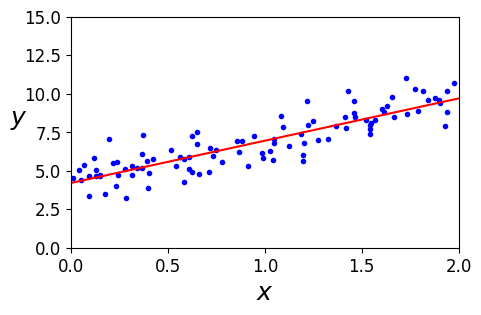

In [8]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

w = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(N):
        random_index = np.random.randint(N)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(w) - yi)
        eta = learning_schedule(epoch * N + i)
        w = w - eta * gradients

plt.plot(X, y, "b.")         
plt.plot(X_new, X_new_b.dot(w), 'r-')
plt.xlabel("$x$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)          
plt.axis([0, 2, 0, 15])                                                       
plt.show()                                           

### Momentum
<hr style="border:2px solid gray">

* Momentum is an extension to the gradient descent optimization algorithm that builds inertia in a search direction
    * Momentum simulates the behavior of a ball rolling down a hill, gaining momentum with each step
    * Faster convergence: Momentum "smooths out" variations in the gradient direction
    * Escaping local minima: Momentum helps overcome local minima by allowing the algorithm to "break free" 
    
* Gradient descent with momentum update rule
$$ \boldsymbol{v}_{k+1} = \beta \boldsymbol{v}_k + \nabla \mathcal{L}(\boldsymbol{\theta}_k)$$
$$ \boldsymbol{\theta}_{k+1} = \boldsymbol{\theta}_k - \eta \boldsymbol{v}_{k+1} $$

Where:
- $ \boldsymbol{v}_k $ is the velocity 
- $\eta$ is the learning rate
- $\beta$ is the momentum coefficient, controlling the impact of the previous velocity
- Note that for $\beta=0$, we recover regular gradient descent

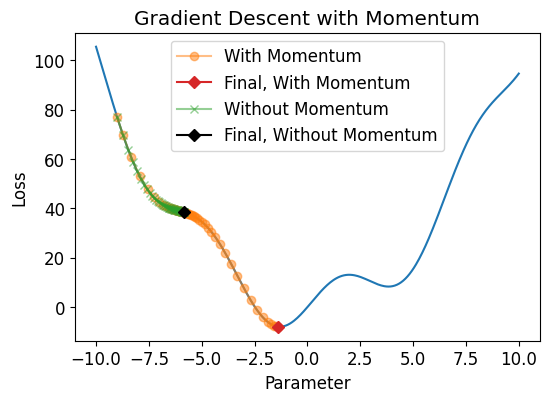

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function
def loss_function(x):
    return x**2 + 10 * np.sin(x)

# Gradient of the loss function
def gradient(x):
    return 2 * x + 10 * np.cos(x)

# Gradient descent with momentum
def gradient_descent_with_momentum(learning_rate, momentum, num_iterations):
    velocity = 0
    x = -9  # Initial value
    trajectory = [x]
    
    for _ in range(num_iterations):
        velocity = momentum * velocity +  gradient(x)
        x -= learning_rate * velocity
        trajectory.append(x)
    
    return trajectory

# Parameters
learning_rate = 0.01
momentum = 0.5
num_iterations = 50

# Run gradient descent algorithms
with_momentum = gradient_descent_with_momentum(learning_rate, momentum, num_iterations)
without_momentum = gradient_descent_with_momentum(learning_rate, 0, num_iterations)

# Plot the results
plt.rcParams.update({'font.size': 12, "figure.figsize": (6,4)})
x_vals = np.linspace(-10, 10, 400)
plt.plot(x_vals, loss_function(x_vals))
plt.plot(with_momentum, loss_function(np.array(with_momentum)), marker='o', alpha=0.5, label='With Momentum')
plt.plot(with_momentum[-1], loss_function(np.array(with_momentum[-1])), marker='D', color='C3', label='Final, With Momentum')
plt.plot(without_momentum, loss_function(np.array(without_momentum)), marker='x', alpha=0.5, label='Without Momentum')
plt.plot(without_momentum[-1], loss_function(np.array(without_momentum[-1])), marker='D', color='black', label='Final, Without Momentum')

plt.xlabel('Parameter')
plt.ylabel('Loss')
plt.title('Gradient Descent with Momentum')
plt.legend(ncols=1)
plt.show()


### Regularization
<hr style="border:2px solid gray">


* Regularization is a way to avoid overfitting by shrinking or simplifying the model  
    * Add a penalty term to NLL or empirical risk 
    
    $$\mathcal{L}(\boldsymbol{\mathbf{w}};\lambda)=\|\mathbf{y}-\mathbf{X}\mathbf{w}\|_2^2+\lambda C(\boldsymbol{\mathbf{w}})$$
    
    
* $\lambda\geq 0$ is the regularization parameter and $C(\boldsymbol{\mathbf{w}})$ is some form of model complexity

* We can quantify complexity using the $\ell_2$ regularization formula, which defines the regularization term as the sum of the squares of all weights

$$\ell_2 \text{ regularization}=\|\mathbf{w}\|_2^2=w_0^2+w_1^2+w_2^2+\ldots$$

### $\ell_1$ regularization or LASSO
<hr style="border:2px solid gray">

* LASSO: Least Absolute Shrinkage and Selection Operator 
    * Uses the $\ell_1$ norm of weights, instead of $\ell_2$
    
    $$\|\mathbf{w}\|_1=|w_0|+|w_1|+|w_2|+\ldots$$
        
  $$\underset{\mathbf{w}}{\operatorname{argmin}} \|\mathbf{y}-\mathbf{X}\mathbf{w}\|_2^2+\lambda \|\mathbf{w}\|_1$$
  
* Definition of the $\ell_p$ norm for a real number $p\geq 1$

$$\|\mathbf{w}\|_p=\big(\sum_i |w_i|^p\big)^{1/p}$$

* Extension: 
    * Elastic Net combines the $\ell_1$ regularization and $\ell_2$ regularization penalties into a single objective function using a convex combination: $\rho \|\mathbf{w}\|_1 + (1-\rho)\|\mathbf{w}\|_2^2$
        + $\rho$ controls the balance between the $\ell_1$ and $\ell_2$ penalties
        
* In the next cell, we will use contour plots to illustrate these regularization techniques. 

    * A contour plot is a graphical technique for representing a 3-dimensional surface on a 2-dimensional plane. It does this by plotting lines (contours) that connect points of equal value on the surface. 

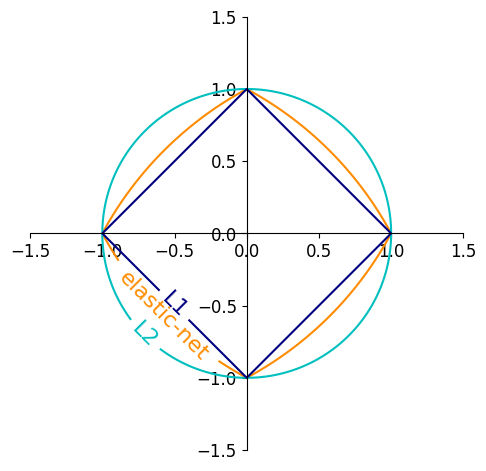

In [10]:
import matplotlib.pyplot as plt
import numpy as np

l1_color = "navy"
l2_color = "c"
elastic_net_color = "darkorange"

line = np.linspace(-1.5, 1.5, 1001)
xx, yy = np.meshgrid(line, line)

l2 = xx**2 + yy**2
l1 = np.abs(xx) + np.abs(yy)
rho = 0.7
elastic_net = rho * l1 + (1 - rho) * l2

plt.figure(figsize=(5, 5), dpi=100)
ax = plt.gca()

# a single contour line will be drawn at the level where 
# the function equals 1.
elastic_net_contour = plt.contour(
    xx, yy, elastic_net, levels=[1], colors=elastic_net_color
)
l2_contour = plt.contour(xx, yy, l2, levels=[1], colors=l2_color)
l1_contour = plt.contour(xx, yy, l1, levels=[1], colors=l1_color)

ax.set_aspect("equal")
ax.spines["left"].set_position("center")
ax.spines["right"].set_color("none")
ax.spines["bottom"].set_position("center")
ax.spines["top"].set_color("none")

# Adds labels to line contours
plt.clabel(
    elastic_net_contour,
    inline=1,
    fontsize=16,
    fmt={1.0: "elastic-net"}, # fmt: a format string for the label
    manual=[(-1, -1)],
)
plt.clabel(l2_contour, inline=1, fontsize=16, fmt={1.0: "L2"}, manual=[(-1, -1)])
plt.clabel(l1_contour, inline=1, fontsize=16, fmt={1.0: "L1"}, manual=[(-1, -1)])

plt.tight_layout()
plt.show()

### Impact of regularization terms
<hr style="border:2px solid gray">

* Write optimization problems in bound constrained forms
$$\underset{\mathbf{w}}{\operatorname{min}} \text{NLL}(\mathbf{w}) \;\text{ s.t. }\; \|\mathbf{w}\|_1\leq 1 \;\text{ or }\; \|\mathbf{w}\|_2^2\leq 1$$

* Let us look at the contours of the $\ell_1$ and $\ell_2$ constrained surfaces
    * Corners of the $\ell_1$ ball are more likely to intersect the ellipse than one of the sides
    
<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/opt.png?raw=true\" width=350>

   

In [11]:
import numpy as np
from sklearn import datasets

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

diabetes_X.shape

(442, 10)

In [12]:
diabetes_X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [13]:
# Use only one feature
diabetes_X = diabetes_X[:,np.newaxis,  2]

diabetes_X.shape

(442, 1)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

* From the user guide 

$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$$


<img src="https://github.com/farhad-pourkamali/MATH6388Online/blob/main/images/rho.png?raw=true" width=600>

In [14]:
# Different forms of regularization 

from sklearn.linear_model import SGDRegressor

alpha = 0.01



l1_reg = SGDRegressor(loss='squared_error',
                      penalty='elasticnet',
                      alpha=alpha,
                      l1_ratio=1,
                      max_iter=10000).fit(diabetes_X, diabetes_y)

l2_reg = SGDRegressor(loss='squared_error',
                      penalty='elasticnet',
                      alpha=alpha,
                      l1_ratio=0,
                      max_iter=10000).fit(diabetes_X, diabetes_y)

l1l2_reg = SGDRegressor(loss='squared_error',
                      penalty='elasticnet',
                      alpha=alpha,
                      l1_ratio=0.5,
                      max_iter=10000).fit(diabetes_X, diabetes_y)

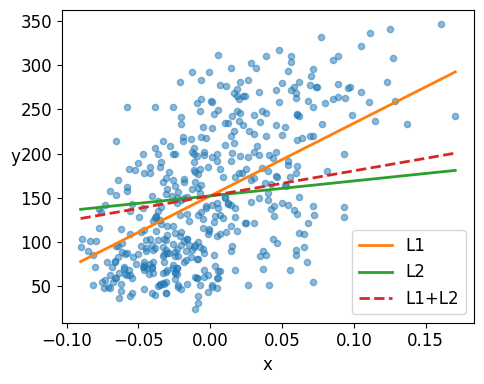

In [15]:
# Plot the results
plt.rcParams.update({'font.size': 12, "figure.figsize": (5,4)})
x_vals = np.linspace(diabetes_X.min(), diabetes_X.max(), 10).reshape(-1,1)
plt.scatter(diabetes_X.ravel(), diabetes_y.ravel(), s=20, alpha=0.5)
plt.plot(x_vals, l1_reg.predict(x_vals), 'C1-', linewidth=2, label='L1')
plt.plot(x_vals, l2_reg.predict(x_vals), 'C2-', linewidth=2, label='L2')
plt.plot(x_vals, l1l2_reg.predict(x_vals), 'C3--', linewidth=2, label='L1+L2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.tight_layout()
plt.show()